In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("./data/IRIS.csv")

In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data = data[data['species'] != '']

Text(0.5, 1.0, 'Sepal Length vs Petal Length by Species')

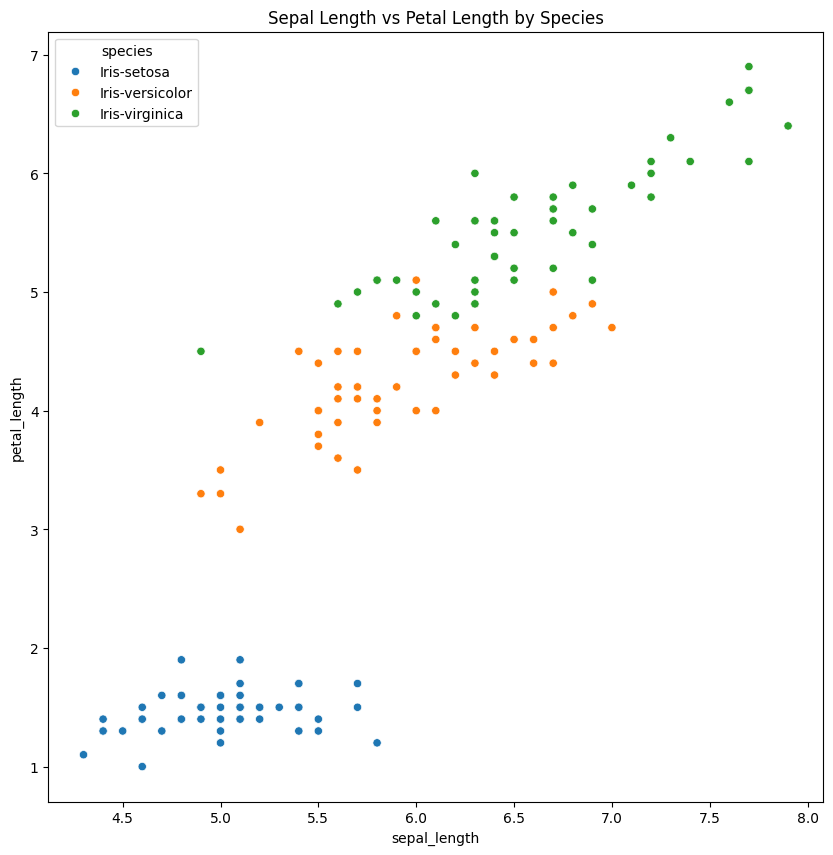

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=data)
plt.title('Sepal Length vs Petal Length by Species')


In [6]:
data = data[data['species'] != 'Iris-versicolor']

In [7]:
data['species'].value_counts()

species
Iris-setosa       50
Iris-virginica    50
Name: count, dtype: int64

In [8]:
correlation_matrix = data.drop('species', axis=1).corr()

<Axes: >

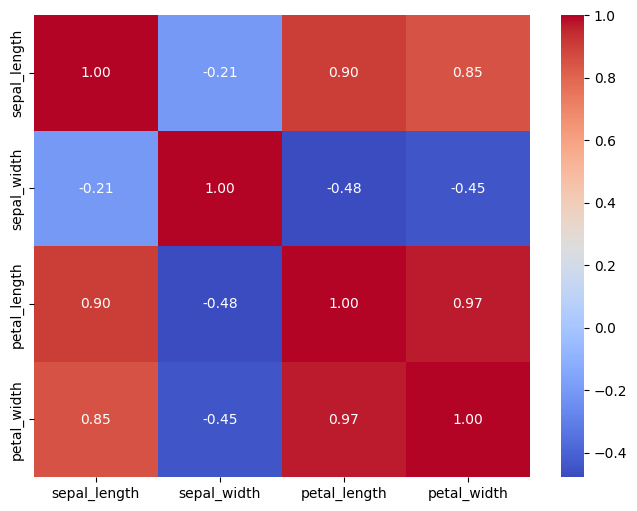

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=.2, random_state=42)

In [11]:
X_train = train_set.drop("species", axis=1)
y_train = train_set['species'].copy()
X_test = test_set.drop("species", axis=1)
y_test = test_set['species'].copy()

In [12]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (80, 4)
The shape of y_train is: (80,)
We have m = 80 training examples


In [13]:
def sigmoid(z):
    '''z: a scalar numpy array of any size
    if z is an array g is z but with sigmoid applied to each element
    '''
    g = 1/(1+np.exp(-z))
    return g

In [14]:
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost

In [15]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    print(m,n)
    ### START CODE HERE ### 
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb-y[i] 
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [16]:
print(X_train.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to a DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)


In [18]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,80.000000,80.000000,80.000000,80.000000
mean,0.424306,0.444318,0.436207,0.454688
std,0.272201,0.189147,0.365255,0.387377
min,0.000000,0.000000,0.000000,0.000000
25%,0.194444,0.363636,0.068966,0.041667
50%,0.402778,0.431818,0.646552,0.604167
75%,0.611111,0.545455,0.775862,0.833333
max,1.000000,1.000000,1.000000,1.000000


In [19]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """
    # Adding regularization term
    m, n = X.shape
    
    cost_without_reg = compute_cost(X, y, w, b) 
    reg_cost = 0.
    
    for j in range(n):
        reg_cost_j = w[j]**2
        reg_cost = reg_cost + reg_cost_j
    reg_cost = (lambda_/(2 * m)) * reg_cost
    
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [20]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    print(dj_dw.shape)
    for i in range(n):
        dj_dw[i] = dj_dw[i] + (lambda_/m)*w[i]       
        
    return dj_db, dj_dw

In [30]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [31]:
y_train_binary = np.where(y_train == 'Iris-setosa', 1, 0)
y_test_binary = np.where(y_test == 'Iris-setosa', 1, 0)

In [32]:
X_train = X_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [29]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_train.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_train, y_train_binary, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)
print(w,b)

80 4
(4,)
Iteration    0: Cost     0.64   
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4,)
80 4
(4

In [ ]:
X_test_scaled = scaler.transform(X_test)   

In [ ]:
def predict(X, w, b):
    """
    Predicts binary labels for the test set using the logistic regression model.

    Args:
        X (numpy.ndarray): Test features of shape (m, n).
        w (numpy.ndarray): Learned weights of shape (n,).
        b (float): Learned bias term.

    Returns:
        numpy.ndarray: Predicted labels (0 or 1).
    """
    z = np.dot(X, w) + b  # Linear combination
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid function
    return (y_pred >= 0.5).astype(int)  # Binary prediction (threshold at 0.5)


In [33]:
# Scale X_test
X_test_scaled = scaler.transform(X_test)

# Predict using the learned model
y_pred_test = predict(X_test_scaled, w, b)

# Evaluate performance
accuracy = np.mean(y_pred_test == y_test_binary) * 100
print(f"Test Set Accuracy: {accuracy:.2f}%")

# Optionally, show predictions vs actual labels
print("Predictions:", y_pred_test[:10])
print("Actual Labels:", y_test_binary[:10])


Test Set Accuracy: 100.00%
Predictions: [0 0 0 1 1 1 1 0 1 1]
Actual Labels: [0 0 0 1 1 1 1 0 1 1]
